In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cifar = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
t = y_train[1]
t

array([9], dtype=uint8)

In [ ]:
y_train[1][0]

9

In [ ]:
class_names[t[0]]

'truck'

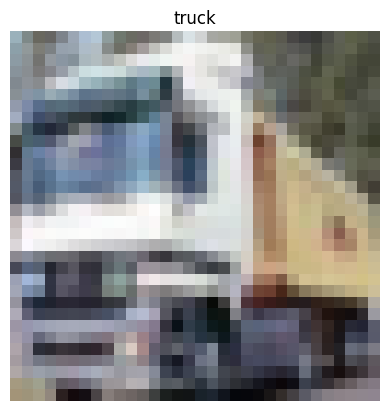

In [ ]:
plt.imshow(x_train[1], cmap = 'gray')
plt.title(class_names[y_train[1][0]])
plt.axis(False)
plt.show()

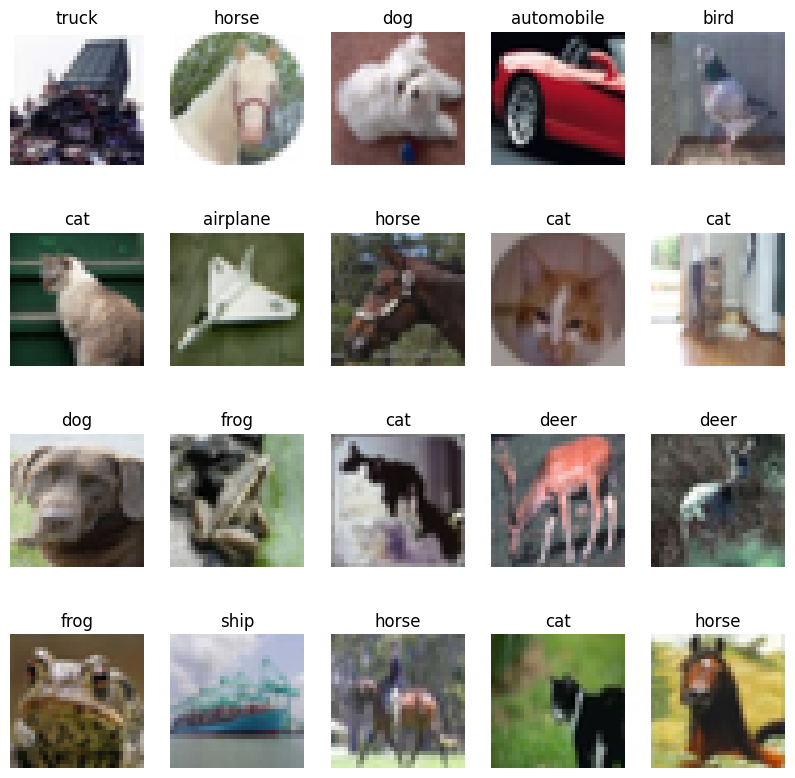

In [ ]:
indices = np.random.randint(0,50000, 20)
plt.figure(figsize = (10,10))

for i in range(len(indices)):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[indices[i]], cmap = "gray")
  plt.title(class_names[y_train[indices[i]][0]])
  plt.axis(False)
plt.show();

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = "relu", input_shape = (32,32,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = "relu"))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(64, activation = "tanh"))
#model.add(Dense(32, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 18s 6ms/step - loss: 1.3720 - accuracy: 0.5122 - val_loss: 1.1175 - val_accuracy: 0.6107
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0297 - accuracy: 0.6376 - val_loss: 1.0077 - val_accuracy: 0.6481
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8939 - accuracy: 0.6863 - val_loss: 0.9369 - val_accuracy: 0.6699
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8016 - accuracy: 0.7215 - val_loss: 0.8527 - val_accuracy: 0.7028
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7197 - accuracy: 0.7494 - val_loss: 0.8663 - val_accuracy: 0.7056
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6465 - accuracy: 0.7745 - val_loss: 0.8836 - val_accuracy: 0.7039
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5830 - accuracy: 0.7963 - val_loss: 0.9051 - val_accuracy: 0.6938
Ep